In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [7]:
mnist = keras.datasets.mnist
(xtrain_full, ytrain_full), (xtest, ytest) = mnist.load_data()

In [8]:
xvalid = xtrain_full[:5000] / 255
xtrain = xtrain_full[5000:] / 255

yvalid = ytrain_full[:5000]
ytrain = ytrain_full[5000:]
xtest = xtest / 255

In [10]:
class_names = np.arange(10).astype(str)
class_names

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U21')

In [11]:
xtrain.shape, ytrain.shape

((55000, 28, 28), (55000,))

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

## Early Stopping

In [16]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    min_delta=0.05,
    verbose=1,
    patience=5,
    restore_best_weights=True
)

In [17]:
history = model.fit(
    xtrain, ytrain,
    epochs=30,
    validation_data=(xvalid, yvalid),
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/30
1719/1719 [==============================] - 63s 37ms/step - loss: 0.5991 - accuracy: 0.8478 - val_loss: 0.3055 - val_accuracy: 0.9150
Epoch 2/30
1719/1719 [==============================] - 64s 37ms/step - loss: 0.2893 - accuracy: 0.9174 - val_loss: 0.2446 - val_accuracy: 0.9328
Epoch 3/30
1719/1719 [==============================] - 67s 39ms/step - loss: 0.2379 - accuracy: 0.9328 - val_loss: 0.2073 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 66s 38ms/step - loss: 0.2032 - accuracy: 0.9418 - val_loss: 0.1826 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 68s 40ms/step - loss: 0.1773 - accuracy: 0.9490 - val_loss: 0.1651 - val_accuracy: 0.9548
Epoch 6/30
1719/1719 [==============================] - 65s 38ms/step - loss: 0.1572 - accuracy: 0.9548 - val_loss: 0.1474 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 66s 39ms/step - loss: 0.1406 - accuracy: 0.9598 - val_loss: 0.1366 -

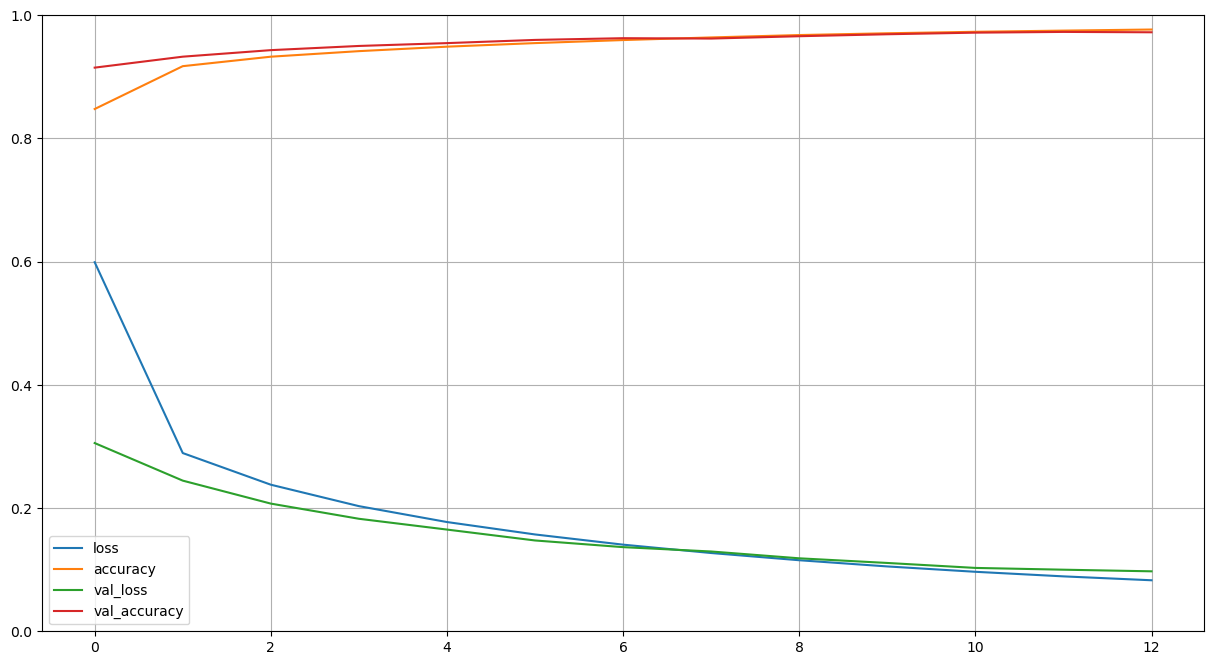

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

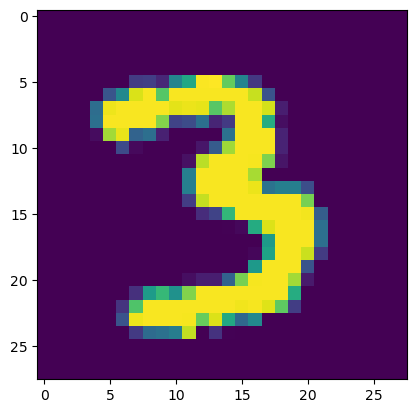

In [21]:
plt.imshow(xtest[500])

In [25]:
xtest[500].shape

(28, 28)

In [29]:
model.predict(tf.expand_dims(xtest[500], axis=0))

1/1 [==============================] - 0s 19ms/step


array([[5.2210662e-09, 6.9688110e-07, 2.0491111e-06, 9.9997711e-01,
        2.7170874e-09, 6.4421874e-06, 2.0763717e-10, 7.8723349e-07,
        1.0617330e-05, 2.2270165e-06]], dtype=float32)

In [31]:
model.predict(tf.expand_dims(xtest[500], axis=0)).argmax(axis=-1)

1/1 [==============================] - 0s 19ms/step


array([3])

In [34]:
class_names[model.predict(tf.expand_dims(xtest[500], axis=0)).argmax(axis=-1)[0]]

1/1 [==============================] - 0s 27ms/step


'3'

In [35]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 5s 17ms/step - loss: 0.1297 - accuracy: 0.9627


[0.12968268990516663, 0.9627000093460083]

In [36]:
model.save('ML-DL-018 Early Stopping MNIST Model.h5')
del model